In [1]:
import warnings
warnings.filterwarnings(action='ignore')

**1. 데이터 수집**

In [2]:
from pathlib import Path
import pandas as pd

auto_mpg_data = pd.read_csv(Path("dataset/auto-mpg-data.csv"))

**2. 데이터구조 훑어보기**

In [3]:
auto_mpg_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Modelname
0,18.0,8,307.0,130.0,3504,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,USA,ford torino


In [4]:
auto_mpg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           320 non-null    float64
 1   Cylinders     328 non-null    int64  
 2   Displacement  328 non-null    float64
 3   Horsepower    323 non-null    float64
 4   Weight        328 non-null    int64  
 5   Acceleration  328 non-null    float64
 6   ModelYear     328 non-null    int64  
 7   Origin        328 non-null    object 
 8   Modelname     328 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 23.2+ KB


In [5]:
auto_mpg_data["MPG"].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
        ..
22.5     1
27.2     1
14.5     1
25.8     1
44.0     1
Name: MPG, Length: 83, dtype: int64

In [6]:
auto_mpg_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear
count,320.000000,328.00000,328.000000,323.000000,328.000000,328.000000,328.000000
mean,22.702813,5.54878,200.221037,107.517028,3012.832317,15.356402,75.204268
std,7.542242,1.74981,109.234747,40.756917,885.398934,2.824492,3.817437
min,9.000000,3.00000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,16.000000,4.00000,104.750000,78.000000,2227.500000,13.500000,72.000000
50%,22.000000,4.00000,151.000000,95.000000,2834.000000,15.500000,75.000000
75%,28.000000,8.00000,302.500000,140.000000,3731.250000,17.000000,77.000000
max,44.000000,8.00000,455.000000,230.000000,5140.000000,24.600000,82.000000


In [7]:
# 추가 코드 – 고해상도 PNG로 그림을 저장하는 코드

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

- NaN median value Processing

In [8]:
auto_mpg_data.isna().sum()

MPG             8
Cylinders       0
Displacement    0
Horsepower      5
Weight          0
Acceleration    0
ModelYear       0
Origin          0
Modelname       0
dtype: int64

In [9]:
median_MPG = auto_mpg_data["MPG"].median()
median_Horsepower = auto_mpg_data["Horsepower"].median()

In [10]:
auto_mpg_data["MPG"].fillna(median_MPG, inplace = True)
auto_mpg_data["Horsepower"].fillna(median_Horsepower, inplace = True)

In [11]:
auto_mpg_data.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
ModelYear       0
Origin          0
Modelname       0
dtype: int64

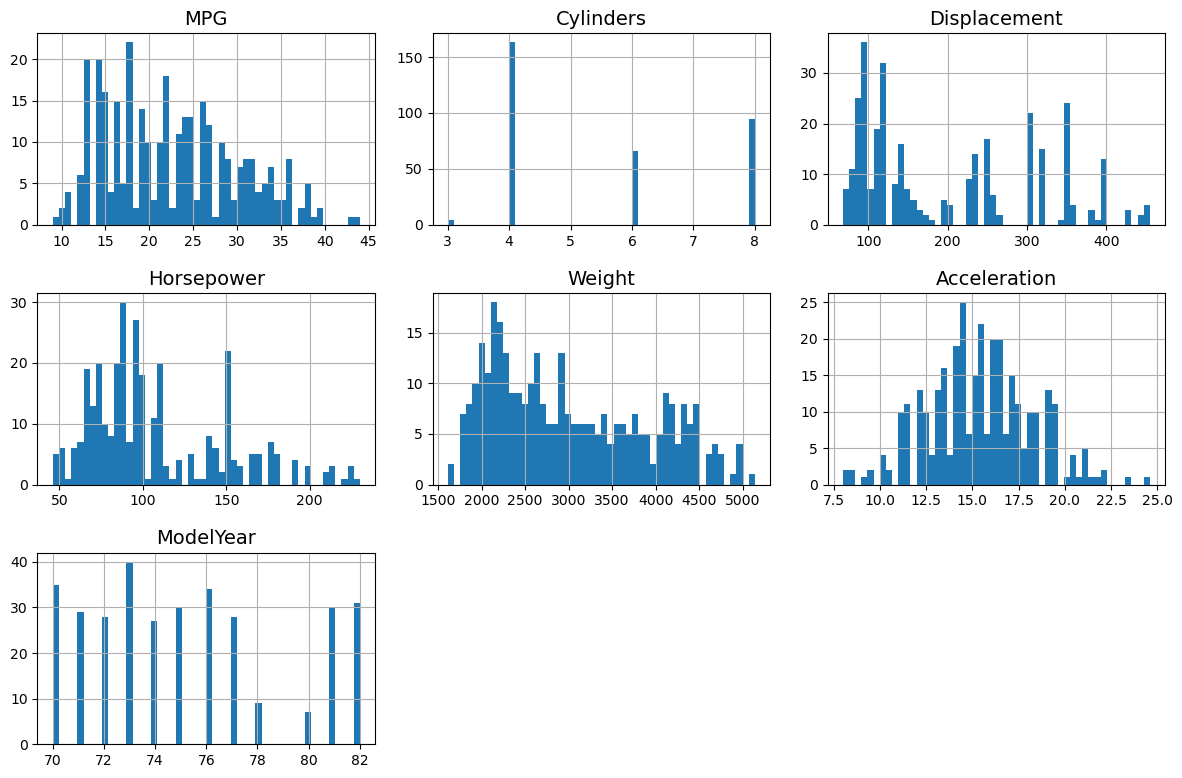

In [12]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

auto_mpg_data.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # 추가 코드
plt.show()

1.3 데이터 세트 만들기

In [13]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [14]:
train_set, test_set = shuffle_and_split_data(auto_mpg_data, 0.2)
len(train_set)

263

In [15]:
len(test_set)

65

In [16]:
np.random.seed(42)

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(auto_mpg_data, test_size=0.2, random_state=42)

In [18]:
auto_mpg_data["mpg_cat"] = pd.cut(auto_mpg_data["MPG"], bins = [0., 10, 20,30, 40, 50], labels = [1,2,3,4,5])

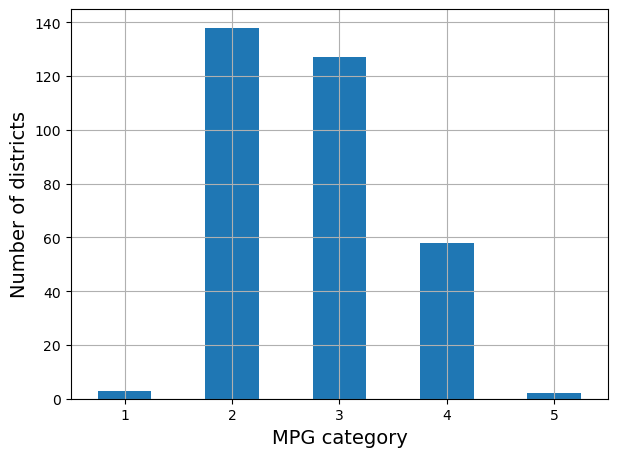

In [19]:
auto_mpg_data["mpg_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("MPG category")
plt.ylabel("Number of districts")
save_fig("auto_mpg_cat_bar_plot")  # extra code
plt.show()

In [20]:
strat_train_set, strat_test_set = train_test_split(
    auto_mpg_data, test_size=0.2, stratify=auto_mpg_data["mpg_cat"], random_state=42)

In [21]:
strat_train_set.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Modelname,mpg_cat
261,29.8,4,89.0,62.0,1845,15.3,80,Europe,vokswagen rabbit,3
142,18.0,6,225.0,105.0,3613,16.5,74,USA,plymouth satellite sebring,2
246,30.0,4,97.0,67.0,1985,16.4,77,Japan,subaru dl,3
3,16.0,8,304.0,150.0,3433,12.0,70,USA,amc rebel sst,2
148,29.0,4,98.0,83.0,2219,16.5,74,Europe,audi fox,3


In [22]:
strat_test_set["mpg_cat"].value_counts() / len(strat_test_set)

2    0.424242
3    0.378788
4    0.181818
1    0.015152
5    0.000000
Name: mpg_cat, dtype: float64

In [23]:
def income_cat_proportions(data):
    return data["mpg_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(auto_mpg_data, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(auto_mpg_data),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Income Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,0.91,1.52,0.00,65.66,-100.00
2,42.07,42.42,51.52,0.83,22.44
3,38.72,37.88,30.30,-2.17,-21.74
4,17.68,18.18,18.18,2.82,2.82
5,0.61,0.00,0.00,-100.00,-100.00


상관관계와 상관계수

In [24]:
corr_matrix = auto_mpg_data.drop(columns=['Modelname']).corr()
corr_matrix = auto_mpg_data.drop(columns=['ModelYear']).corr()

In [25]:
corr_matrix

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
MPG,1.000000,-0.783811,-0.805764,-0.769849,-0.839713,0.439490
Cylinders,-0.783811,1.000000,0.954257,0.852190,0.903518,-0.570651
Displacement,-0.805764,0.954257,1.000000,0.903783,0.933128,-0.607322
Horsepower,-0.769849,0.852190,0.903783,1.000000,0.873859,-0.720631
Weight,-0.839713,0.903518,0.933128,0.873859,1.000000,-0.489796
Acceleration,0.439490,-0.570651,-0.607322,-0.720631,-0.489796,1.000000


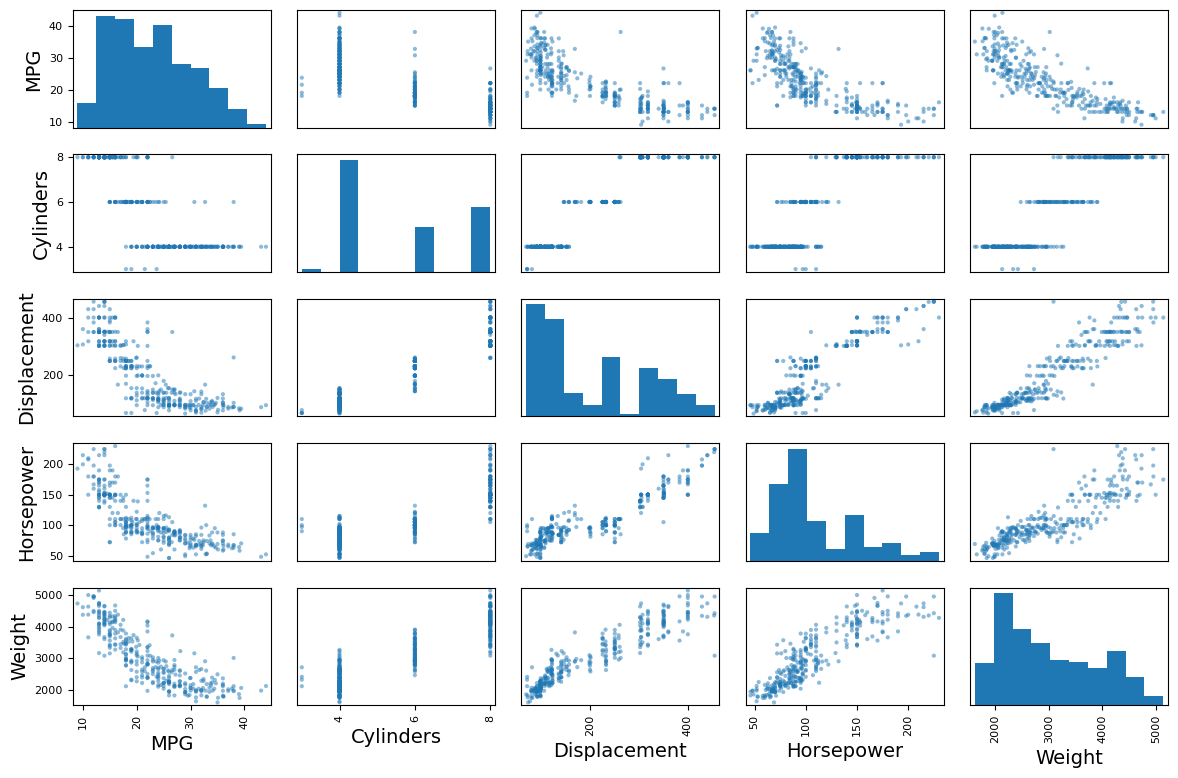

In [26]:
from pandas.plotting import scatter_matrix

attributes = ["MPG","Cylinders","Displacement", "Horsepower", "Weight"]
scatter_matrix(auto_mpg_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

In [27]:
corr_matrix["Horsepower"].sort_values(ascending=False)

Horsepower      1.000000
Displacement    0.903783
Weight          0.873859
Cylinders       0.852190
Acceleration   -0.720631
MPG            -0.769849
Name: Horsepower, dtype: float64

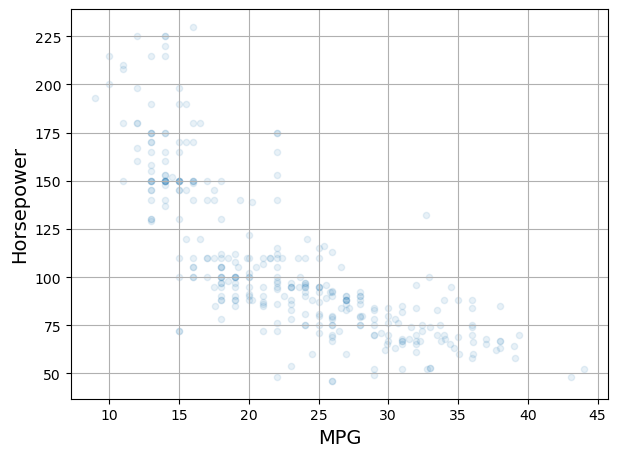

In [28]:
auto_mpg_data.plot(kind="scatter", x="MPG", y="Horsepower",
             alpha=0.1, grid=True)
save_fig("MPG_vs_Horsepower_value_scatterplot")  # extra code
plt.show()

In [29]:
# 코드 2-7
import pandas as pd
#리스트에 데이터 삽입하기
engListening = [30, 60, 90]
engScore = [70, 80, 90]

#리스트를 데이터프레임으로 변환하기
data = {'engListening':engListening, 'engScore':engScore}
df = pd.DataFrame(data)

#상관분석 수행하기
coef = df.corr(method='pearson')
print(coef)

              engListening  engScore
engListening           1.0       1.0
engScore               1.0       1.0


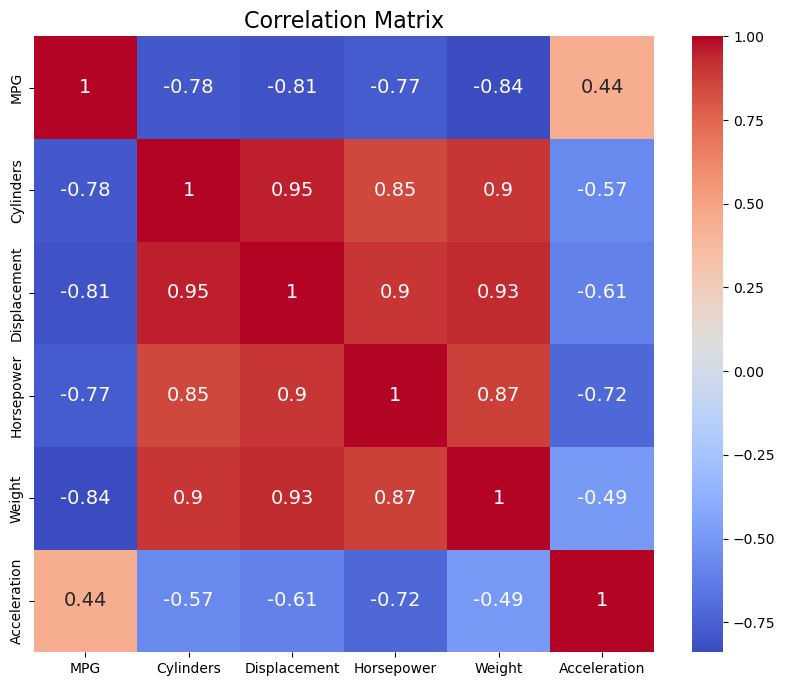

In [30]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix', fontsize=16)
plt.show()

데이터 정제(Data Cleaning)

In [31]:
auto_mpg_data = strat_train_set.drop("ModelYear", axis=1)
auto_mpg_data_labels = strat_train_set["ModelYear"].copy()

In [32]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [33]:
auto_mpg_data_num = auto_mpg_data.select_dtypes(include=[np.number])

In [34]:
auto_mpg_data_num

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
261,29.8,4,89.0,62.0,1845,15.3
142,18.0,6,225.0,105.0,3613,16.5
246,30.0,4,97.0,67.0,1985,16.4
3,16.0,8,304.0,150.0,3433,12.0
148,29.0,4,98.0,83.0,2219,16.5
...,...,...,...,...,...,...
178,24.0,4,134.0,96.0,2702,13.5
15,15.0,8,383.0,170.0,3563,10.0
89,23.0,4,120.0,97.0,2506,14.5
65,25.0,4,97.5,80.0,2126,17.0


In [35]:
imputer.fit(auto_mpg_data_num)

SimpleImputer(strategy='median')

In [36]:
imputer.statistics_

array([  22. ,    4. ,  142.5,   95. , 2764.5,   15.5])

In [37]:
auto_mpg_data_num.median().values

array([  22. ,    4. ,  142.5,   95. , 2764.5,   15.5])

In [38]:
X = imputer.transform(auto_mpg_data_num)

In [39]:
imputer.feature_names_in_

array(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration'], dtype=object)

In [40]:
auto_mpg_data_tr = pd.DataFrame(X, columns=auto_mpg_data_num.columns,
                          index=auto_mpg_data_num.index)

In [41]:
null_rows = df.isna().any(axis=1)
null_rows_idx = df.index[null_rows].tolist()

In [42]:
imputer.strategy

'median'

In [43]:
auto_mpg_data_tr = pd.DataFrame(X, columns=auto_mpg_data_num.columns,
                          index=auto_mpg_data_num.index)

In [44]:
# 코드 2-7
import pandas as pd
#리스트에 데이터 삽입하기
engListening = [30, 60, 90]
engScore = [70, 80, 90]

#리스트를 데이터프레임으로 변환하기
data = {'engListening':engListening, 'engScore':engScore}
df = pd.DataFrame(data)

#상관분석 수행하기
coef = df.corr(method='pearson')
print(coef)

              engListening  engScore
engListening           1.0       1.0
engScore               1.0       1.0


In [45]:
null_rows = df.isna().any(axis=1)
null_rows_idx = df.index[null_rows].tolist()

In [46]:
auto_mpg_data_tr.loc[null_rows_idx].head()  

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration


텍스트와 범주형 특성

In [47]:
auto_mpg_data_cat = auto_mpg_data[["Origin"]]
auto_mpg_data_cat.head(8)

,Origin
261,Europe
142,USA
246,Japan
3,USA
148,Europe
258,USA
61,Japan
114,USA


In [48]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
auto_mpg_data_cat_1hot = cat_encoder.fit_transform(auto_mpg_data_cat)
#auto_mpg_data_cat_1hot

In [49]:
cat_encoder.categories_

[array(['Europe', 'Japan', 'USA'], dtype=object)]

In [50]:
df_test = pd.DataFrame({"Origin": ["USA", "Europe"]})
df_test

,Origin
0,USA
1,Europe


In [51]:
pd.get_dummies(df_test)

,Origin_Europe,Origin_USA
0,0,1
1,1,0


In [52]:
df_test_unknown = pd.DataFrame({"Origin": ["Japan"]})
pd.get_dummies(df_test_unknown)

,Origin_Japan
0,1


In [53]:
cat_encoder.feature_names_in_

array(['Origin'], dtype=object)

In [54]:
cat_encoder.get_feature_names_out()

array(['Origin_Europe', 'Origin_Japan', 'Origin_USA'], dtype=object)

In [55]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [56]:
df_output

,Origin_Europe,Origin_Japan,Origin_USA
0,0.0,1.0,0.0


**특성 스케일링(Feature Scaling)**
Standard Scaler

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(auto_mpg_data_labels.to_frame())

In [58]:
model = LinearRegression()
model.fit(auto_mpg_data[["Horsepower"]], scaled_labels)
some_new_data = auto_mpg_data[["Horsepower"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions)

In [59]:
some_new_data

,Horsepower
261,62.0
142,105.0
246,67.0
3,150.0
148,83.0


In [60]:
predictions

array([[76.89108389],
       [75.26397974],
       [76.70188573],
       [73.56119632],
       [76.09645163]])

In [61]:
from sklearn.compose import TransformedTargetRegressor

model = TransformedTargetRegressor(LinearRegression(),
                                   transformer=StandardScaler())
model.fit(auto_mpg_data[["Horsepower"]], auto_mpg_data_labels)
predictions = model.predict(some_new_data)

In [62]:
predictions

array([76.89108389, 75.26397974, 76.70188573, 73.56119632, 76.09645163])

multimodal

In [63]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(auto_mpg_data[["Horsepower"]], [[95]], gamma=0.1)

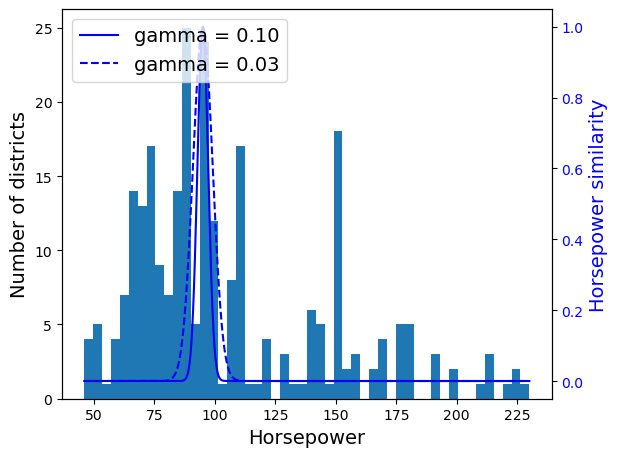

In [64]:
horsepower = np.linspace(auto_mpg_data["Horsepower"].min(),
                   auto_mpg_data["Horsepower"].max(),
                   500).reshape(-1, 1)
gamma1 = 0.1
gamma2 = 0.03
rbf1 = rbf_kernel(horsepower, [[95]], gamma=gamma1)
rbf2 = rbf_kernel(horsepower, [[95]], gamma=gamma2)

fig, ax1 = plt.subplots()

ax1.set_xlabel("Horsepower")
ax1.set_ylabel("Number of districts")
ax1.hist(auto_mpg_data["Horsepower"], bins=50)

ax2 = ax1.twinx()  # create a twin axis that shares the same x-axis
color = "blue"
ax2.plot(horsepower, rbf1, color=color, label="gamma = 0.10")
ax2.plot(horsepower, rbf2, color=color, label="gamma = 0.03", linestyle="--")
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel("Horsepower similarity", color=color)

plt.legend(loc="upper left")
save_fig("Horsepower_similarity_plot")
plt.show()

**변환 파이프라인**

In [65]:
import sklearn
sklearn.set_config(display="diagram")

In [66]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

from sklearn import set_config

set_config(display='diagram')

num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [67]:
auto_mpg_data_num_prepared = num_pipeline.fit_transform(auto_mpg_data_num)
auto_mpg_data_num_prepared[:2].round(2)

array([[ 0.92, -0.86, -0.99, -1.1 , -1.29, -0.02],
       [-0.65,  0.29,  0.26, -0.03,  0.72,  0.4 ]])

In [68]:
print(type(auto_mpg_data_num))
print(type(auto_mpg_data_num_prepared))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [69]:
df_auto_mpg_data_num_prepared = pd.DataFrame(
    auto_mpg_data_num_prepared, columns=num_pipeline.get_feature_names_out(),
    index=auto_mpg_data_num.index)

In [70]:
df_auto_mpg_data_num_prepared.head(2)  

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration
261,0.923282,-0.864104,-0.986987,-1.097287,-1.28564,-0.022705
142,-0.652352,0.288035,0.264488,-0.027999,0.72335,0.402202


In [71]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

In [72]:
num_pipeline[1]

StandardScaler()

In [73]:
num_pipeline[:-1]

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [74]:
num_pipeline.named_steps["simpleimputer"]

SimpleImputer(strategy='median')

In [75]:
num_pipeline.set_params(simpleimputer__strategy="median")

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [76]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = ["MPG", "Cylinders", "Displacement", "Horsepower",
               "Weight", "Acceleration"]
cat_attribs = ["Modelname"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs)])
   # ("cat", cat_pipeline, cat_attribs)])

In [77]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['MPG', 'Cylinders', 'Displacement',
                                  'Horsepower', 'Weight', 'Acceleration'])])

In [78]:
from sklearn.compose import make_column_selector, make_column_transformer

preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number))
    #(cat_pipeline, make_column_selector(dtype_include=object)),
)

In [79]:
auto_mpg_data_prepared = preprocessing.fit_transform(auto_mpg_data)

In [80]:
auto_mpg_data_num_prepared[:2].round(2)

array([[ 0.92, -0.86, -0.99, -1.1 , -1.29, -0.02],
       [-0.65,  0.29,  0.26, -0.03,  0.72,  0.4 ]])

In [81]:
auto_mpg_data_prepared_fr = pd.DataFrame(
    auto_mpg_data_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=auto_mpg_data.index)
auto_mpg_data_prepared_fr.head(2)

,pipeline__MPG,pipeline__Cylinders,pipeline__Displacement,pipeline__Horsepower,pipeline__Weight,pipeline__Acceleration
261,0.923282,-0.864104,-0.986987,-1.097287,-1.28564,-0.022705
142,-0.652352,0.288035,0.264488,-0.027999,0.72335,0.402202


In [82]:
auto_mpg_data_prepared_fr

,pipeline__MPG,pipeline__Cylinders,pipeline__Displacement,pipeline__Horsepower,pipeline__Weight,pipeline__Acceleration
261,0.923282,-0.864104,-0.986987,-1.097287,-1.285640,-0.022705
142,-0.652352,0.288035,0.264488,-0.027999,0.723350,0.402202
246,0.949988,-0.864104,-0.913371,-0.972951,-1.126557,0.366793
3,-0.919409,1.440173,0.991448,1.091023,0.518815,-1.191199
148,0.816460,-0.864104,-0.904169,-0.575077,-0.860661,0.402202
...,...,...,...,...,...,...
178,0.148818,-0.864104,-0.572896,-0.251804,-0.311825,-0.660065
15,-1.052937,1.440173,1.718407,1.588366,0.666535,-1.899377
89,0.015290,-0.864104,-0.701724,-0.226937,-0.534541,-0.305976
65,0.282346,-0.864104,-0.908770,-0.649678,-0.966338,0.579247


** 모델 선택과 훈련**

**훈련 세트에서 훈련하고 평가하기**

LinearRegression 모델훈련 및 평가

In [83]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(auto_mpg_data, auto_mpg_data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018FFA0E5CA0>)])),
                ('linearregression', LinearRegression())])

In [84]:
auto_mpg_data_predictions = lin_reg.predict(auto_mpg_data)
auto_mpg_data_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([100., 100., 100., 100., 100.])

In [85]:
auto_mpg_data_labels.iloc[:5].values

array([80, 74, 77, 70, 74], dtype=int64)

In [86]:
error_ratios = auto_mpg_data_predictions[:5].round(-2) / auto_mpg_data_labels.iloc[:5].values - 1
print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

25.0%, 35.1%, 29.9%, 42.9%, 35.1%


In [87]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(auto_mpg_data_labels, auto_mpg_data_predictions,
                              squared=False)
lin_rmse

2.6373708438652446

결정트리이용

In [88]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(auto_mpg_data, auto_mpg_data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018FFA0E5CA0>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [89]:
auto_mpg_data_predictions = tree_reg.predict(auto_mpg_data)
tree_rmse = mean_squared_error(auto_mpg_data_labels, auto_mpg_data_predictions,
                              squared=False)
tree_rmse

0.0436852028330519

**교차 검증(Cross-Validation) 평가**

In [90]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, auto_mpg_data, auto_mpg_data_labels,
                              scoring="neg_root_mean_squared_error", cv=10)

In [91]:
pd.Series(tree_rmses).describe()

count    10.000000
mean      2.949281
std       0.755557
min       2.201398
25%       2.355433
50%       2.706072
75%       3.493343
max       4.385290
dtype: float64

In [92]:
lin_rmses = -cross_val_score(lin_reg, auto_mpg_data, auto_mpg_data_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(lin_rmses).describe()

count    10.000000
mean      2.700246
std       0.400726
min       2.111693
25%       2.337346
50%       2.879053
75%       2.955739
max       3.281933
dtype: float64

Random Forest

In [93]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,
                           RandomForestRegressor(random_state=42))
forest_rmses = -cross_val_score(forest_reg, auto_mpg_data, auto_mpg_data_labels,
                                scoring="neg_root_mean_squared_error", cv=10)

In [94]:
pd.Series(forest_rmses).describe()

count    10.000000
mean      2.342558
std       0.404188
min       1.795710
25%       2.089314
50%       2.343060
75%       2.513844
max       3.197457
dtype: float64

In [95]:
forest_reg.fit(auto_mpg_data, auto_mpg_data_labels)
auto_mpg_data_predictions = forest_reg.predict(auto_mpg_data)
forest_rmse = mean_squared_error(auto_mpg_data_labels, auto_mpg_data_predictions,
                                 squared=False)
forest_rmse

0.8461917961461022

**모델 세부튜닝**

**from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV랜덤 탐색**

In [96]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV

In [109]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.pipeline import Pipeline

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_distribs = {
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(auto_mpg_data, auto_mpg_data_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('pipeline',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardscaler',
                                                                                                StandardScaler())]),
                                                                               <sklearn.compose._column_transformer.make_column_selector object at 0x0000018FFA0E5CA0>)])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018FFA26B6A0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [110]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res = cv_res[[
                 "param_random_forest__max_features", "split0_test_score",
                 "split1_test_score", "split2_test_score", "mean_test_score"]]
score_cols = ["split0", "split1", "split2", "mean_test_rmse"]
cv_res.columns = ["max_features"] + score_cols
cv_res[score_cols] = -cv_res[score_cols].round().astype(np.int64)
cv_res.head()

,max_features,split0,split1,split2,mean_test_rmse
0,8,3,2,2,2
1,16,3,2,2,2
2,12,3,2,2,2
3,9,3,2,2,2
4,8,3,2,2,2


**최적 모델 및 모델 오차 분석**

In [111]:
final_model = rnd_search.best_estimator_  # includes preprocessing
final_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000018FFA0EA760>)])),
                ('random_forest',
                 RandomForestRegressor(max_features=8, random_state=42))])

In [112]:
feature_importances = final_model["random_forest"].feature_importances_
feature_importances

array([0.51058344, 0.00398756, 0.12707525, 0.09573224, 0.15386684,
       0.10875467])

In [113]:
feature_importances.round(2)

array([0.51, 0.  , 0.13, 0.1 , 0.15, 0.11])

In [114]:
sorted(zip(feature_importances,
           final_model["preprocessing"].get_feature_names_out()),
           reverse=True)

[(0.5105834448262417, 'pipeline__MPG'),
 (0.1538668427422058, 'pipeline__Weight'),
 (0.12707524681571347, 'pipeline__Displacement'),
 (0.1087546660446696, 'pipeline__Acceleration'),
 (0.09573223509942003, 'pipeline__Horsepower'),
 (0.003987564471749206, 'pipeline__Cylinders')]

테스트 세트로 시스템 평가

In [115]:
strat_test_set

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,ModelYear,Origin,Modelname,mpg_cat
173,13.0,8,302.0,129.0,3169,12.0,75,USA,ford mustang ii,2
162,15.0,6,250.0,72.0,3158,19.5,75,USA,ford maverick,2
69,13.0,8,350.0,165.0,4274,12.0,72,USA,chevrolet impala,2
321,36.0,4,135.0,84.0,2370,13.0,82,USA,dodge charger 2.2,4
243,25.5,4,140.0,89.0,2755,15.8,77,USA,ford mustang ii 2+2,3
...,...,...,...,...,...,...,...,...,...,...
109,26.0,4,97.0,46.0,1950,21.0,73,Europe,volkswagen super beetle,3
139,25.0,4,140.0,75.0,2542,17.0,74,USA,chevrolet vega,3
44,18.0,6,232.0,100.0,3288,15.5,71,USA,amc matador,2
221,13.0,8,302.0,130.0,3870,15.0,76,USA,ford f108,2


In [116]:
X_test = strat_test_set.drop("ModelYear", axis=1)
X_test

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Modelname,mpg_cat
173,13.0,8,302.0,129.0,3169,12.0,USA,ford mustang ii,2
162,15.0,6,250.0,72.0,3158,19.5,USA,ford maverick,2
69,13.0,8,350.0,165.0,4274,12.0,USA,chevrolet impala,2
321,36.0,4,135.0,84.0,2370,13.0,USA,dodge charger 2.2,4
243,25.5,4,140.0,89.0,2755,15.8,USA,ford mustang ii 2+2,3
...,...,...,...,...,...,...,...,...,...
109,26.0,4,97.0,46.0,1950,21.0,Europe,volkswagen super beetle,3
139,25.0,4,140.0,75.0,2542,17.0,USA,chevrolet vega,3
44,18.0,6,232.0,100.0,3288,15.5,USA,amc matador,2
221,13.0,8,302.0,130.0,3870,15.0,USA,ford f108,2


In [117]:
y_test = strat_test_set["MPG"].copy()
y_test

173    13.0
162    15.0
69     13.0
321    36.0
243    25.5
       ... 
109    26.0
139    25.0
44     18.0
221    13.0
1      15.0
Name: MPG, Length: 66, dtype: float64

In [118]:
final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)

53.520992675944626


In [119]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([52.19012283, 54.81956213])

In [120]:
squared_errors

173    3517.6761
162    3543.8209
69     3546.2025
321    2072.9809
243    2881.5424
         ...    
109    2094.8929
139    2626.5625
44     2958.2721
221    3789.6336
1      3280.9984
Name: MPG, Length: 66, dtype: float64

In [122]:
final_predictions

array([72.31      , 74.53      , 72.55      , 81.53      , 79.18      ,
       77.43      , 75.74      , 71.94      , 73.86      , 73.51      ,
       75.8       , 74.21      , 71.84      , 79.15      , 71.46      ,
       76.71      , 73.12      , 74.46      , 72.28      , 74.27      ,
       80.43      , 75.02      , 71.91      , 75.58      , 74.38      ,
       78.63      , 73.81      , 72.83      , 74.6       , 75.14      ,
       73.72      , 73.02      , 73.57933333, 80.03      , 73.91      ,
       81.49      , 77.27      , 81.56      , 75.21      , 71.45      ,
       77.54      , 73.29666667, 71.53      , 72.53      , 72.59      ,
       72.1       , 76.9       , 72.69      , 74.95      , 75.95      ,
       76.36      , 79.98      , 74.66      , 81.29      , 74.49      ,
       81.37      , 72.74      , 74.96      , 81.69      , 72.49      ,
       72.295     , 71.77      , 76.25      , 72.39      , 74.56      ,
       72.28      ])